# Sentimental analysis of Covid19 of time 

In [14]:
import tweepy as ty
import pandas as pd
import numpy as np
import re


import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


from textblob import Word, TextBlob



In [15]:
#Twitter API credentials, keys and tokens from the Twitter Dev Console 
consumer_key = 'kN1fqEXeaDrXIOPRHbJOJbq7S'
consumer_secret = 'l52epNKTPsj42NBq5xL7x02PP8tmw4HyJy4zeDIC42MtH9cVf4'
access_token = '1347602020665065474-UpprxnN6XCceaLPfyEVcR9JQDMgT0t'
access_token_secret = 'zPRQGjY0LdeKcn1hrxrj6sb5HcWXGy2j4RNFGIbeM8dc2'


In [16]:
# create OAuthHandler object 
auth = ty.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_token_secret) 

# create API object to fetch tweets with auth info

api = ty.API(auth,wait_on_rate_limit=True) 

In [17]:
hashtag = "#covid19"
query = ty.Cursor(api.search, q=hashtag,lang = "en").items(1000)
tweets = [{'Tweets':tweet.text,'Timestamp':tweet.created_at}for tweet in query]




In [18]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,"RT @joshgerstein: By my count, federal prosecu...",2021-01-24 23:54:33
1,RT @DrEricDing: OH SHIT—Outbreak infects 124 o...,2021-01-24 23:54:33
2,RT @GrittyNurse: Not another one 😰. A nurse ha...,2021-01-24 23:54:32
3,RT @robbiekane74: Warning to vulnerable family...,2021-01-24 23:54:31
4,RT @newsblogmedia: People are throwing bricks ...,2021-01-24 23:54:30


In [19]:
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob


nltk.download("stopwords")
nltk.download("wordnet")
stop_words = stopwords.words("english")
custom_stopwords =["RT","#covid19"]



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spandanagali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/spandanagali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
#cleaning of the tweets : 
def clean_tweets(tweet, custom_stopwords):
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r':','',tweet)
    tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    clean_tweet = tweet
    clean_tweet.replace('[^\w\s]', '')
    
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in custom_stopwords)
    clean_tweet = " ".join(Word(word).lemmatize() for word in clean_tweet.split())
    return(clean_tweet)

df['clean Tweet'] = df['Tweets'].apply(lambda x: clean_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,clean Tweet
0,"RT @joshgerstein: By my count, federal prosecu...",2021-01-24 23:54:33,"By count, federal prosecutor appealed four pre..."
1,RT @DrEricDing: OH SHIT—Outbreak infects 124 o...,2021-01-24 23:54:33,OH SHIT—Outbreak infects 124 127 nursing home ...
2,RT @GrittyNurse: Not another one 😰. A nurse ha...,2021-01-24 23:54:32,Not another one 😰. A nurse taken life. She wor...
3,RT @robbiekane74: Warning to vulnerable family...,2021-01-24 23:54:31,Warning vulnerable family member neighbour ! #...
4,RT @newsblogmedia: People are throwing bricks ...,2021-01-24 23:54:30,People throwing brick railway station #Eindhov...


In [21]:
# Sentimental analysis 
df['polarity'] = df['clean Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['clean Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['clean Tweet','polarity', 'subjectivity']].head(20)




,clean Tweet,polarity,subjectivity
0,"By count, federal prosecutor appealed four pre...",0.000000,0.000000
1,OH SHIT—Outbreak infects 124 127 nursing home ...,-0.166667,0.166667
2,Not another one 😰. A nurse taken life. She wor...,0.000000,0.000000
3,Warning vulnerable family member neighbour ! #...,-0.625000,0.500000
4,People throwing brick railway station #Eindhov...,0.136364,0.500000
5,"I hope everyone know going protests, increasin...",0.000000,0.000000
6,"Melanie Featherstone, 41yo Donor Recruiter, Am...",0.200000,0.250000
7,Mulling 🇬🇧 disclosure new #B117 variant could ...,0.018182,0.427273
8,Canada get zero vaccine Pfizer week 80% cut ne...,0.000000,0.000000
9,Mulling 🇬🇧 disclosure new #B117 variant could ...,0.018182,0.427273


In [28]:
# negative, positive and neutaral 
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Sentiment']= df['polarity'].apply(analysis)

df

,Tweets,Timestamp,clean Tweet,polarity,subjectivity,Sentiment
0,"RT @joshgerstein: By my count, federal prosecu...",2021-01-24 23:54:33,"By count, federal prosecutor appealed four pre...",0.000000,0.000000,Neutral
1,RT @DrEricDing: OH SHIT—Outbreak infects 124 o...,2021-01-24 23:54:33,OH SHIT—Outbreak infects 124 127 nursing home ...,-0.166667,0.166667,Negative
2,RT @GrittyNurse: Not another one 😰. A nurse ha...,2021-01-24 23:54:32,Not another one 😰. A nurse taken life. She wor...,0.000000,0.000000,Neutral
3,RT @robbiekane74: Warning to vulnerable family...,2021-01-24 23:54:31,Warning vulnerable family member neighbour ! #...,-0.625000,0.500000,Negative
4,RT @newsblogmedia: People are throwing bricks ...,2021-01-24 23:54:30,People throwing brick railway station #Eindhov...,0.136364,0.500000,Positive
...,...,...,...,...,...,...
995,What next? #COVID19 \n\nOh.\n\nhttps://t.co/sG...,2021-01-24 23:41:32,What next? #COVID19 Oh. https//t.co/sGM1W0iY6F,0.000000,0.000000,Neutral
996,@Buccaneers Cool but don’t allow all these peo...,2021-01-24 23:41:31,Cool don’t allow people come Tampa spread #COV...,0.350000,0.650000,Positive
997,RT @DrEricDing: Mulling 🇬🇧 disclosure that new...,2021-01-24 23:41:30,Mulling 🇬🇧 disclosure new #B117 variant could ...,0.018182,0.427273,Positive
998,RT @178kakapo: Japanese #PM_Suga is also unrel...,2021-01-24 23:41:29,Japanese #PM_Suga also unreliable. He plan lea...,0.000000,0.000000,Neutral


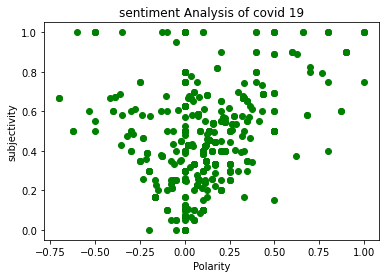

In [29]:
#plot

for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i],df['subjectivity'][i],color='Green')
    
plt.title('sentiment Analysis of covid 19')
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.show()

In [30]:
# percentage of positive or negative 

positive_twt = df[df.Sentiment == 'Positive']
negative_twt = df[df.Sentiment == 'Negative']
neutral_twt = df[df.Sentiment == 'Neutral']

ppercent=round( (positive_twt.shape[0]/df.shape[0])*100,1)
npercent=round( (negative_twt.shape[0]/df.shape[0])*100,1)
nnpercent=round( (neutral_twt.shape[0]/df.shape[0])*100,1)

print("Positive :" + str(ppercent) + "%")
print("Negative :" + str(npercent) + "%")
print("Neutral :" + str(nnpercent) + "%")





Positive :41.7%
Negative :14.1%
Neutral :44.2%


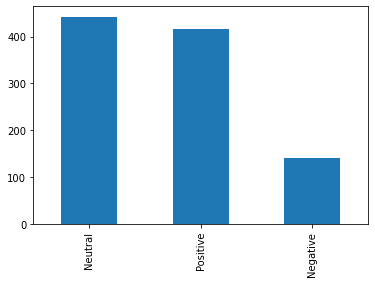

In [31]:
df['Sentiment'].value_counts()
df['Sentiment'].value_counts().plot(kind="bar")
plt.show()